In [1]:
from numpy.random.mtrand import rand
from agent import Agent
from maze import Maze
from policy import Policy

from util import plot_matrix, transform_policy_to_matrix_values

In [2]:
MAX_EPISODES = 100_000
THRESHOLD = 0.01
CONVERGED_THRESHOLD=1_000

In [3]:
maze = Maze(
    lenght=4,
    height=4,
    all_rewards=-1,
    special_rewards={
        (3, 0): 40,
        (2, 1): -10,
        (3, 1): -10,
        (0, 3): 10,
        (1, 3): -2},
    end_positions=[(3, 0), (0, 3)]
)

In [4]:
random_policy = Policy(lenght=4, height=4, greedy=False)
optimal_policy = Policy(lenght=4, height=4)

In [5]:
agent = Agent(maze, optimal_policy, (2, 3), 1)
agent.value_iteration()
agent.update_policy_to_deterministic()


Sweep 0: 
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
Sweep 1: 
[[-1 -1 40  0]
 [-1 -1 -1 40]
 [10 -1 -1 -1]
 [ 0 10 -1 -1]]
Sweep 2: 
[[-2 39 40  0]
 [ 9 -2 39 40]
 [10  9 -2 30]
 [ 0 10  8 -2]]
Sweep 3: 
[[38 39 40  0]
 [ 9 38 39 40]
 [10  9 29 30]
 [ 0 10  8 29]]
Sweep 4: 
[[38 39 40  0]
 [37 38 39 40]
 [10 37 29 30]
 [ 0 10 28 29]]
Sweep 5: 
[[38 39 40  0]
 [37 38 39 40]
 [36 37 36 30]
 [ 0 36 28 29]]
Sweep 6: 
[[38 39 40  0]
 [37 38 39 40]
 [36 37 36 35]
 [ 0 36 35 29]]
Sweep 7: 
[[38 39 40  0]
 [37 38 39 40]
 [36 37 36 35]
 [ 0 36 35 34]]
Done after 7 sweeps!



In [6]:
agent.simulate()


Simulating agent starting on (2, 3)
Moving from (2, 3) to (2, 2) ↑
Moving from (2, 2) to (1, 2) ←
Moving from (1, 2) to (1, 1) ↑
Moving from (1, 1) to (1, 0) ↑
Moving from (1, 0) to (2, 0) →
Moving from (2, 0) to (3, 0) →
Finished simulation om (3, 0)



In [7]:
agent.visualize()


Values:         Policy:
 38 39 40  0    →  →  →  ⦾   
 37 38 39 40    →  ↑  ↑  ↑   
 36 37 36 35    →  ↑  ←  ←   
  0 36 35 34    ⦾  ↑  ↑  ↑   



## First-visit Monte Carlo prediction
Policy: random<br>
discount: 1

In [8]:
agent.policy = random_policy
agent.discount = 1
agent.first_visit_mc_prediction(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Stopped after 61710 episodes.
[[-14.76490367 -11.48702534   0.95462833   0.        ]
 [-14.05606269 -16.31339307 -12.85927655  -4.29108231]
 [ -7.05571653 -13.77994587 -18.90151856 -18.81286375]
 [  0.          -8.38076004 -17.60214915 -20.08006623]]


[[-14.764903666542136, -11.487025343828389, 0.9546283251843871, 0],
 [-14.056062693765071,
  -16.313393073383384,
  -12.859276546091015,
  -4.29108230772376],
 [-7.055716532825565,
  -13.779945871896823,
  -18.90151855823446,
  -18.81286374529271],
 [0, -8.380760036270711, -17.60214915108532, -20.080066232240146]]

## First-visit Monte Carlo prediction
Policy: random<br>
discount: 0.9

In [9]:
agent.discount = 0.9
agent.first_visit_mc_prediction(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Stopped after 16751 episodes.
[[-5.16651864 -3.2928361   6.43285187  0.        ]
 [-5.19077696 -7.54226902 -5.09330726  1.64301695]
 [-0.92068507 -5.76244213 -9.07761193 -8.59139048]
 [ 0.         -1.82769702 -7.23160979 -8.05501833]]


[[-5.166518639794517, -3.2928361027377786, 6.432851865588657, 0],
 [-5.190776959142928,
  -7.5422690213906245,
  -5.09330725776031,
  1.6430169487150392],
 [-0.9206850741042517,
  -5.762442133157409,
  -9.077611927646506,
  -8.591390477246277],
 [0, -1.8276970226290294, -7.231609785440577, -8.055018328257448]]

## First-visit Monte Carlo prediction
Policy: optimal<br>
discount: 1

In [10]:
agent.policy = optimal_policy
agent.discount = 1
agent.first_visit_mc_prediction(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Stopped after 56 episodes.
[[38. 39. 40.  0.]
 [37. 38. 39. 40.]
 [36. 37. 36. 35.]
 [ 0. 36. 35. 34.]]


[[38.0, 39.0, 40.0, 0],
 [37.0, 38.0, 39.0, 40.0],
 [36.0, 37.0, 36.0, 35.0],
 [0, 36.0, 35.0, 34.0]]

## First-visit Monte Carlo prediction
Policy: optimal<br>
discount: 0.9

In [11]:
agent.discount = 0.9
agent.first_visit_mc_prediction(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Stopped after 38 episodes.
[[30.5     35.      40.       0.     ]
 [26.45    30.5     35.      40.     ]
 [22.805   26.45    22.805   19.5245 ]
 [ 0.      22.805   19.5245  16.57205]]


[[30.5, 35.0, 40.0, 0],
 [26.449999999999992, 30.5, 35.0, 40.0],
 [22.805, 26.450000000000035, 22.805000000000028, 19.524499999999993],
 [0, 22.804999999999982, 19.524499999999993, 16.572049999999994]]

## Tabular TD
Policy: random<br>
discount: 1

In [12]:
agent.policy = random_policy
agent.discount = 1
agent.tabular_td(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Delta did not become small enough in 100000 episodes
[[-15.74421064 -12.35458864  -2.1285497    0.        ]
 [-14.87184368 -18.08795652 -13.5972594   -7.27158717]
 [-10.06934206 -14.96548883 -20.79613843 -18.94143455]
 [  0.          -3.10818488 -16.84290274 -19.60885257]]


[[-15.744210636978549, -12.354588644032285, -2.128549699863325, 0],
 [-14.871843682250878,
  -18.08795651868522,
  -13.597259399032648,
  -7.271587165766437],
 [-10.069342060129857,
  -14.965488826053171,
  -20.79613842846316,
  -18.941434545681112],
 [0, -3.108184883690785, -16.842902742488548, -19.608852573040238]]

## Tabular TD
Policy: random<br>
discount: 0.9

In [13]:
agent.policy = random_policy
agent.discount = 0.9
agent.tabular_td(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Delta did not become small enough in 100000 episodes
[[ -5.44098219  -3.35983217  11.3125917    0.        ]
 [ -3.95644236  -9.41634217  -5.71547952   3.34307813]
 [  1.93523976  -5.70409883 -10.19424059  -7.10747979]
 [  0.          -2.98831136  -7.10900796  -7.2951585 ]]


[[-5.440982188976227, -3.3598321745786777, 11.312591703642406, 0],
 [-3.9564423643930318,
  -9.416342165641813,
  -5.715479517591886,
  3.343078129582584],
 [1.9352397576512108,
  -5.704098828071762,
  -10.194240593602549,
  -7.107479789217513],
 [0, -2.9883113564368333, -7.10900796306368, -7.295158496364106]]

## Tabular TD
Policy: optimal<br>
discount: 1

In [14]:
agent.policy = optimal_policy
agent.discount = 1
agent.tabular_td(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Stopped after 1130 episodes.
[[37.99999999 39.         40.          0.        ]
 [36.99999809 38.         38.99996634 39.99995947]
 [35.99986553 37.         36.         34.99999995]
 [ 0.         35.99992745 34.99999986 33.99987113]]


[[37.999999992075246, 38.99999999999994, 39.99999999999997, 0],
 [36.99999809433897,
  37.999999999999915,
  38.999966338327255,
  39.99995946513529],
 [35.999865534724265, 36.999999999999886, 35.99999999999986, 34.9999999545422],
 [0, 35.99992744566313, 34.999999861766696, 33.999871126585305]]

## Tabular TD
Policy: optimal<br>
discount: 0.9

In [15]:
agent.discount = 0.9
agent.tabular_td(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Stopped after 1108 episodes.
[[30.49999999 35.         40.          0.        ]
 [26.44999991 30.5        34.99998192 39.99998255]
 [22.80498145 26.45       22.805      19.52449997]
 [ 0.         22.80499239 19.52449997 16.57194684]]


[[30.499999989865042, 34.99999999999994, 39.99999999999997, 0],
 [26.449999910075107,
  30.499999999999936,
  34.99998191637273,
  39.999982551069884],
 [22.80498144828339,
  26.449999999999925,
  22.804999999999914,
  19.524499968164413],
 [0, 22.804992394144318, 19.524499969681365, 16.571946843370792]]

## On-policy first-visit Monte Carlo control
policy: random e-soft<br>
discount: 1

In [16]:
agent.policy = random_policy
agent.policy.reset_policy()
agent.discount = 1
qf = agent.on_policy_first_vist_mc(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Delta did not become small enough in 100000 episodes


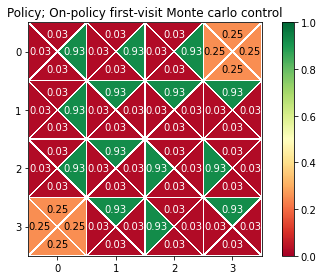

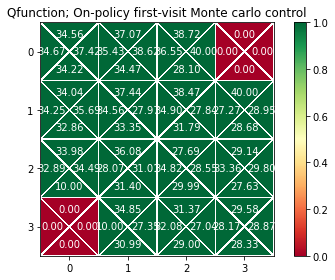

In [17]:
plot_matrix(4, 4, transform_policy_to_matrix_values(agent.policy.policy_matrix), 'Policy; On-policy first-visit Monte carlo control')
plot_matrix(4, 4, transform_policy_to_matrix_values(qf), 'Qfunction; On-policy first-visit Monte carlo control')

## On-policy first-visit Monte Carlo control
policy: random e-soft<br>
discount: 0.9

In [18]:
agent.policy.reset_policy()
agent.discount = 0.9
qf = agent.on_policy_first_vist_mc(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Delta did not become small enough in 100000 episodes


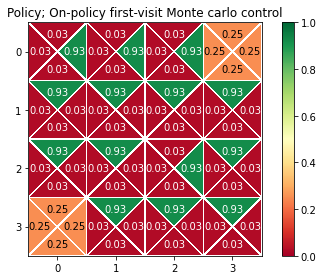

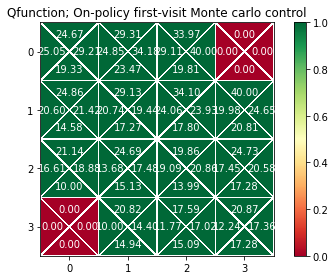

In [19]:
plot_matrix(4, 4, transform_policy_to_matrix_values(agent.policy.policy_matrix), 'Policy; On-policy first-visit Monte carlo control')
plot_matrix(4, 4, transform_policy_to_matrix_values(qf), 'Qfunction; On-policy first-visit Monte carlo control')

## Sarsa (on-policy TD control)
policy: derived from Q<br>
discount: 1

In [20]:
agent.policy.reset_policy()
agent.discount = 1
qf = agent.sarsa(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Delta did not become small enough in 100000 episodes


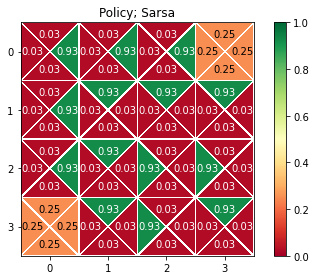

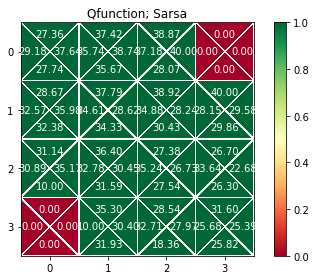

In [21]:
plot_matrix(4, 4, transform_policy_to_matrix_values(agent.policy.policy_matrix), 'Policy; Sarsa')
plot_matrix(4, 4, transform_policy_to_matrix_values(qf), 'Qfunction; Sarsa')

## Sarsa (on-policy TD control)
policy: derived from Q<br>
discount: 0.9

In [22]:
agent.policy.reset_policy()
agent.discount = 0.9
qf = agent.sarsa(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Delta did not become small enough in 100000 episodes


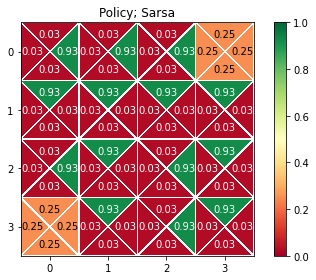

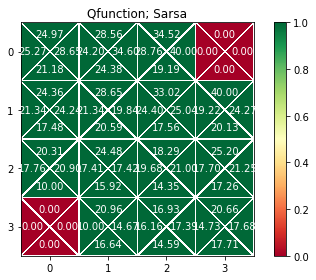

In [23]:
plot_matrix(4, 4, transform_policy_to_matrix_values(agent.policy.policy_matrix), 'Policy; Sarsa')
plot_matrix(4, 4, transform_policy_to_matrix_values(qf), 'Qfunction; Sarsa')

## Q-learning (off-policy TD control)
policy: derived from Q<br>
discount: 1

In [24]:
agent.policy.reset_policy()
agent.discount = 1
qf = agent.q_learning(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Stopped after 35747 episodes.


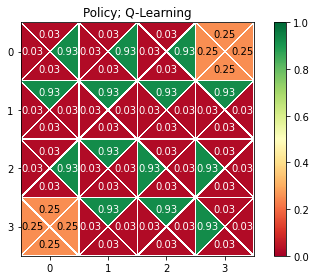

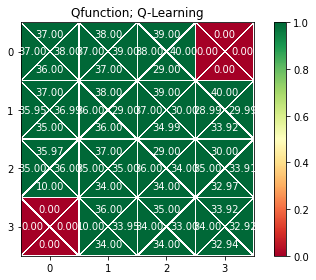

In [25]:
plot_matrix(4, 4, transform_policy_to_matrix_values(agent.policy.policy_matrix), 'Policy; Q-Learning')
plot_matrix(4, 4, transform_policy_to_matrix_values(qf), 'Qfunction; Q-Learning')

## Q-learning (off-policy TD control)
policy: derived from Q<br>
discount: 0.9

In [26]:
agent.policy.reset_policy()
agent.discount = 0.9
qf = agent.q_learning(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Stopped after 35826 episodes.


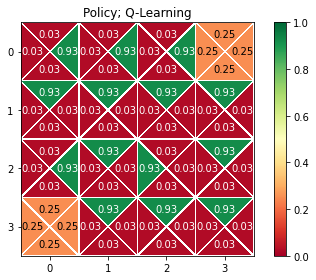

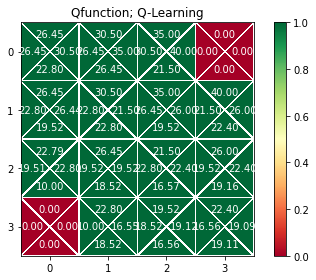

In [27]:
plot_matrix(4, 4, transform_policy_to_matrix_values(agent.policy.policy_matrix), 'Policy; Q-Learning')
plot_matrix(4, 4, transform_policy_to_matrix_values(qf), 'Qfunction; Q-Learning')

## Double Q-learning
policy: derived from Q<br>
discount: 1

In [28]:
agent.policy.reset_policy()
agent.discount = 1
qf = agent.double_q_learning(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

Stopped after 73926 episodes.


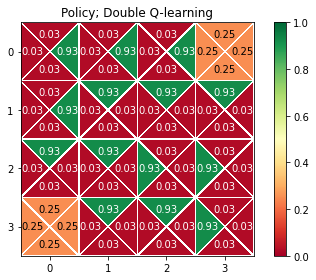

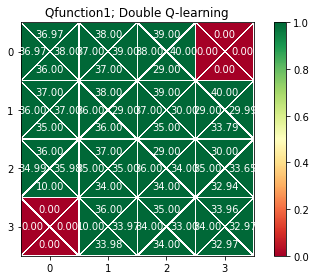

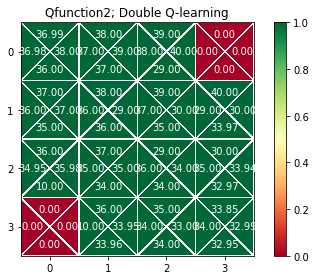

In [29]:
plot_matrix(4, 4, transform_policy_to_matrix_values(agent.policy.policy_matrix), 'Policy; Double Q-learning')
plot_matrix(4, 4, transform_policy_to_matrix_values(qf[0]), 'Qfunction1; Double Q-learning')
plot_matrix(4, 4, transform_policy_to_matrix_values(qf[1]), 'Qfunction2; Double Q-learning')

## Double Q-learning
policy: derived from Q<br>
discount: 0.9

In [ ]:
agent.policy.reset_policy()
agent.discount = 0.9
qf = agent.double_q_learning(max_episodes=MAX_EPISODES, threshold=THRESHOLD, converged_threshold=CONVERGED_THRESHOLD)

In [ ]:
plot_matrix(4, 4, transform_policy_to_matrix_values(agent.policy.policy_matrix), 'Policy; Double Q-learning')
plot_matrix(4, 4, transform_policy_to_matrix_values(qf[0]), 'Qfunction1; Double Q-learning')
plot_matrix(4, 4, transform_policy_to_matrix_values(qf[1]), 'Qfunction2; Double Q-learning')